# Sex Associated Contigs


In [257]:
import pandas as pd
import numpy as np
import sys
from tqdm import tqdm
import scipy.stats as stats
import matplotlib.pyplot as plt

sys.path.append('/home/groups/dpwall/briannac/general_scripts/plotting/')
from pvals_distribution_plots import PlotPvals

# Load in p-values

In [258]:
pvals = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/query_counts.sex_microbes.pvals/pvals.txt', header=None, index_col=0)
pvals_index = set(pvals.index)
pvals[1] = np.array([2*min(p, 1-p) for p in pvals[1].values])

/home/users/briannac/.local/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  
/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log10
  import sys


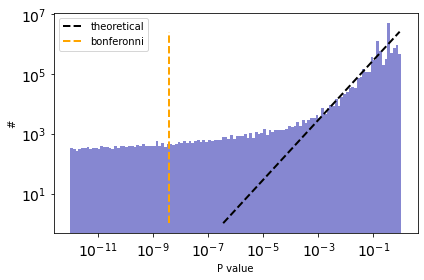

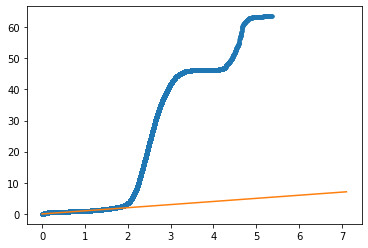

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.


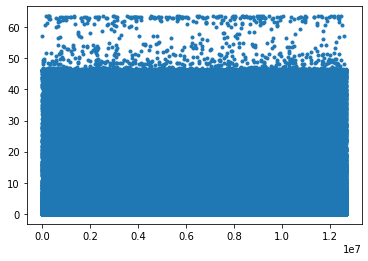

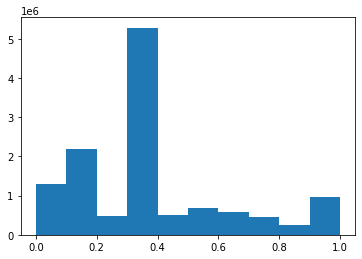

In [259]:
pvals_new = pvals[1].values #np.array([2*min(p, 1-p) for p in pvals[1].values])
expected = np.arange(0,len(pvals_new))/len(pvals_new)
PlotPvals(pvals_new)

plt.figure()
plt.plot(sorted(-np.log10(expected)), sorted(-np.log10(pvals_new)), '.')
plt.plot(sorted(-np.log10(expected)), sorted(-np.log10(expected)), '-')
#plt.ylim(0,np.nanmax(-np.log10(expected[1:]))*2)
plt.show()
plt.plot(-np.log10(pvals_new), '.')
plt.show()

plt.hist(pvals_new)
plt.show()

In [260]:
pvals_clipped = np.array([min(20,x) for x in -np.log10(pvals[1].values)])
effect_size_clipped = np.array([np.log2(min(10,x)) for x in pvals[2].values])

/home/users/briannac/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


In [263]:
min(effect_size_clipped)

-0.6280312226130421

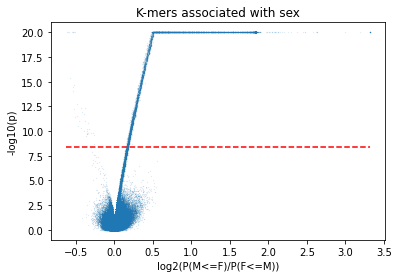

In [264]:
plt.plot(effect_size_clipped[::10], pvals_clipped[::10], '.', markersize=.1)
plt.xlabel('log2(P(M<=F)/P(F<=M))')
plt.ylabel('-log10(p)')
plt.hlines(xmin=min(effect_size_clipped), xmax=max(effect_size_clipped), y=-np.log10(.05/len(pvals)), linestyle='dashed', color='red')
plt.savefig('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/volcano_plot_kmers.svg', transparent=True)
plt.title('K-mers associated with sex')
plt.show()

# Get significant k-mers for de novo assembly or masking or whatever.

In [68]:
# Significant pvalues.
pvals_sig_male = set(pvals[(pvals[1]<(.05/len(pvals))) & (pvals[2]>0)].index)
pvals_sig_female = set(pvals[(pvals[1]<(.05/len(pvals))) & (pvals[2]<0)].index)

In [71]:
# Load in significant k-mers
kmers_male = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers.sex_microbes.list', header=None, 
                           nrows=len(pvals_sig_male), skiprows=lambda x: x not in pvals_sig_male)
kmers_male.index = sorted(pvals_sig_male)

# Load in significant k-mers
kmers_female = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/kmers.sex_microbes.list', header=None, 
                           nrows=len(pvals_sig_female), skiprows=lambda x: x not in pvals_sig_female)
kmers_female.index = sorted(pvals_sig_female)

np.savetxt('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_female.txt',
           kmers_female[0].values, fmt='%s')
np.savetxt('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_male.txt',
           kmers_male[0].values, fmt='%s')

In [119]:
# De novo assemble significant k-mers
np.savetxt('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_female.txt',
           kmers_female[0].values, fmt='%s')
np.savetxt('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_male.txt',
           kmers_male[0].values, fmt='%s')

In [ ]:
# TESTING de novo assembly

In [178]:
kmers_female_set = set(pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_female.txt', usecols=[0], header=None)[0].values)
kmers_male_set = set(pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_male.txt', usecols=[0], header=None)[0].values)


In [165]:
SAMPLE='02C10540'

OUTFILE_MALE='/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/y_chrom_association/denovo/%s.reads_from_male_kmers.fastq' % (SAMPLE)
OUTFILE_FEMALE='/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/y_chrom_association/denovo/%s.reads_from_female_kmers.fastq' % (SAMPLE)

FASTQ_FILE = '/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/y_chrom_association/%s/%s.y_associated_seqs.fastq' % (SAMPLE, SAMPLE)


# Read in k-mers associated with females and males.
kmers_female_set = set(pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_female.txt', usecols=[0], header=None)[0].values)
kmers_male_set = set(pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/results/y_chrom_association/sig_kmers_male.txt', usecols=[0], header=None)[0].values)

# Male
with open(OUTFILE_MALE, 'w') as outfile:
    with open(FASTQ_FILE) as infile:
        for i, line in enumerate(infile.readlines()):
            if i%4==0:  read_idx=line
            elif i%4==1:  seq=line
            elif i%4==2:  plus=line
            elif i%4==3: 
                qual=line
                kmers = set([seq[i:i+100] for i in range(50)])
                if len(kmers_male_set.intersection(kmers)):
                    outfile.write(read_idx)
                    outfile.write(seq)
                    outfile.write(plus)
                    outfile.write(line)
                    
# Female
with open(OUTFILE_FEMALE, 'w') as outfile:
    with open(FASTQ_FILE) as infile:
        for i, line in enumerate(infile.readlines()):
            if i%4==0:  read_idx=line
            elif i%4==1:  seq=line
            elif i%4==2:  plus=line
            elif i%4==3: 
                qual=line
                kmers = set([seq[i:i+100] for i in range(50)])
                if len(kmers_female_set.intersection(kmers)):
                    outfile.write(read_idx)
                    outfile.write(seq)
                    outfile.write(plus)
                    outfile.write(line)


In [141]:
for l in range(1,len(seqs), 4):
    kmers = set([seqs[l][i:i+100] for i in range(50)])
    if len(kmers_male_set.intersection(kmers)):
        #print(seqs[(l-1):(l+3)])
        print(l)
        #break

225
229
233
237
241
245
249
253
257
261
265
269
273
277
281
285
289
293
297
301
305
309
313
317
321
329
341
349
361
365
369
373
389
397
401
405
409
413
421
425
433
441
445
449
453
461
465
469
473
481
485
489
493
497
501
505
509
513
517
521
529
533
537
545
549
553
557
561
565
569
573
577
585
589
593
597
601
605
609
613
617
621
625
629
633
637
641
645
649
653
657
661
665
669
673
677
681
685
701
705
713
717
721
725
729
737
741
745
749
753
757
765
769
773
777
781
785
793
797
801
805
809
813
817
821
833
837
841
845
849
853
857
861
865
869
873
877
881
885
889
893
897
901
905
909
913
917
921
925
929
933
937
941
945
949
953
957
961
965
969
973
977
981
985
989
993
997
1005
1009
1013
1017
1021
1025
1033
1037
1041
1045
1049
1053
1057
1061
1065
1069
1073
1077
1081
1085
1089
1093
1097
1101
1105
1109
1113
1117
1121
1125
1129
1133
1137
1141
1145
1149
1153
1157
1161
1169
1177
1185
1189
1193
1197
1201
1205
1209
1213
1217
1221
1225
1229
1233
1237
1241
1245
1249
1253
1257
1265
1269
1273
1277
1281
1285
12

In [135]:
len(kmers_male_set.intersection(kmers))

0

In [88]:
rows = set(pvals_sig_male).union([-1])#[:100]
counts_df = pd.read_table('/home/groups/dpwall/briannac/blood_microbiome/intermediate_files/query_counts.sex_microbes/query_counts.sex_microbes.0000.tsv.gz', 
                   skiprows=lambda x: x-1 not in rows)
counts_df.index = sorted(rows)[1:(len(counts_df)+1)]

In [97]:
BLOOD_MICROBIOME_DIR = '/home/groups/dpwall/briannac/blood_microbiome/'
BAM_MAPPINGS_FILE = BLOOD_MICROBIOME_DIR + 'data/bam_mappings.csv'
bam_mappings = pd.read_csv(BAM_MAPPINGS_FILE, sep='\t', index_col=1)


In [101]:
from collections import Counter

In [104]:
df_microbe = counts_df.transpose()

In [108]:
participant_to_sample_id = {i:j for i,j in zip(bam_mappings.participant_id, bam_mappings.index) if j in df_microbe.index}
# Find full fams.
fam_aggs = bam_mappings.groupby('family')[['relationship']].agg(lambda x: list(x))
full_fams = fam_aggs[[(Counter(f)['mother']==1) & (Counter(f)['father']==1) for f in fam_aggs.relationship.values]].index
df_microbe_fams = df_microbe[[f in full_fams for f in bam_mappings.loc[df_microbe.index].family.values]]

df_microbe_child = df_microbe_fams[bam_mappings.loc[df_microbe_fams.index].relationship=='sibling']
df_microbe_child = df_microbe_child[[f in participant_to_sample_id for f in bam_mappings.loc[df_microbe_child.index].FatherID]]
df_microbe_child = df_microbe_child[[f in participant_to_sample_id for f in bam_mappings.loc[df_microbe_child.index].MotherID]]


df_microbe_father = df_microbe_fams.loc[[participant_to_sample_id[f]  for f in bam_mappings.loc[df_microbe_child.index].FatherID]]#
df_microbe_mother = df_microbe_fams.loc[[participant_to_sample_id[f]  for f in bam_mappings.loc[df_microbe_child.index].MotherID]]#


def ComputeCorr(a,b):
    return stats.metrics.r2_score(-np.log10(a+1),-np.log10(b+1))
    #return -np.log10(stats.spearmanr(-np.log10(a+1),-np.log10(b+1)).pvalue)


father_son_child = df_microbe_child[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='1.0']
father_son_parent = df_microbe_father[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='1.0']
father_son_child.index = list(range(len(father_son_child)))
father_son_parent.index = list(range(len(father_son_parent)))
father_son_corrs = [ComputeCorr(father_son_child[c], father_son_parent[c]) for c in father_son_child.columns]

father_daughter_child = df_microbe_child[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='2.0']
father_daughter_parent = df_microbe_father[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='2.0']
father_daughter_child.index = list(range(len(father_daughter_child)))
father_daughter_parent.index = list(range(len(father_daughter_parent)))
father_daughter_corrs = [ComputeCorr(father_daughter_child[c], father_daughter_parent[c]) for c in father_daughter_child.columns]

mother_son_child = df_microbe_child[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='1.0']
mother_son_parent = df_microbe_mother[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='1.0']
mother_son_child.index = list(range(len(mother_son_child)))
mother_son_parent.index = list(range(len(mother_son_parent)))
mother_son_corrs = [ComputeCorr(mother_son_child[c], mother_son_parent[c]) for c in mother_son_child.columns]

mother_daughter_child = df_microbe_child[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='2.0']
mother_daughter_parent = df_microbe_mother[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='2.0']
mother_daughter_child.index = list(range(len(mother_daughter_child)))
mother_daughter_parent.index = list(range(len(mother_daughter_parent)))
mother_daughter_corrs = [ComputeCorr(mother_daughter_child[c], mother_daughter_parent[c]) for c in mother_daughter_child.columns]


AttributeError: module 'scipy.stats' has no attribute 'metrics'

In [109]:
import scipy.stats as stats

In [106]:
y_associated_contigs

NameError: name 'y_associated_contigs' is not defined

In [84]:
counts_df

,02C10540,02C10541,02C10542,02C10543,02C10702,02C10704,02C10855,02C10856,02C10857,02C10858,...,MH0138051,MH0138052,MH0138054,MH0138055,MH0138989,MH0143008,MH0143009,MH0143013,MH0143018,MH0143019
0,2,0,0,4,0,0,0,0,3,2,...,0,0,0,0,0,0,0,0,0,0
1,7,0,0,4,0,0,0,0,4,3,...,0,0,3,0,0,9,0,6,3,0
2,0,0,0,0,0,0,0,0,0,0,...,8,0,10,0,0,0,0,0,0,0
3,0,0,0,3,0,0,0,0,2,0,...,0,0,0,0,0,2,0,2,0,0
4,9,0,0,7,0,0,0,0,4,2,...,0,0,2,0,0,9,0,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0,0,0,6,0,0,0,0,0,0,...,4,0,10,0,0,3,0,7,0,0
337,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
338,13,0,0,31,0,0,0,0,22,20,...,4,0,31,0,0,22,0,29,5,0
339,11,0,0,22,0,0,0,0,21,18,...,7,0,6,0,0,14,0,20,4,0


# Heritability

In [ ]:
# Heritability

participant_to_sample_id = {i:j for i,j in zip(bam_mappings.participant_id, bam_mappings.index) if j in df_microbe.index}
# Find full fams.
fam_aggs = bam_mappings.groupby('family')[['relationship']].agg(lambda x: list(x))
full_fams = fam_aggs[[(Counter(f)['mother']==1) & (Counter(f)['father']==1) for f in fam_aggs.relationship.values]].index
df_microbe_fams = df_microbe[[f in full_fams for f in bam_mappings.loc[df_microbe.index].family.values]]

df_microbe_child = df_microbe_fams[bam_mappings.loc[df_microbe_fams.index].relationship=='sibling']
df_microbe_child = df_microbe_child[[f in participant_to_sample_id for f in bam_mappings.loc[df_microbe_child.index].FatherID]]
df_microbe_child = df_microbe_child[[f in participant_to_sample_id for f in bam_mappings.loc[df_microbe_child.index].MotherID]]


df_microbe_father = df_microbe_fams.loc[[participant_to_sample_id[f]  for f in bam_mappings.loc[df_microbe_child.index].FatherID]]#
df_microbe_mother = df_microbe_fams.loc[[participant_to_sample_id[f]  for f in bam_mappings.loc[df_microbe_child.index].MotherID]]#


def ComputeCorr(a,b):
    return metrics.r2_score(-np.log10(a+1),-np.log10(b+1))
    #return -np.log10(stats.spearmanr(-np.log10(a+1),-np.log10(b+1)).pvalue)


father_son_child = df_microbe_child[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='1.0'][list(y_associated_contigs)]
father_son_parent = df_microbe_father[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='1.0'][list(y_associated_contigs)]
father_son_child.index = list(range(len(father_son_child)))
father_son_parent.index = list(range(len(father_son_parent)))
father_son_corrs = [ComputeCorr(father_son_child[c], father_son_parent[c]) for c in father_son_child.columns]

father_daughter_child = df_microbe_child[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='2.0'][list(y_associated_contigs)]
father_daughter_parent = df_microbe_father[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='2.0'][list(y_associated_contigs)]
father_daughter_child.index = list(range(len(father_daughter_child)))
father_daughter_parent.index = list(range(len(father_daughter_parent)))
father_daughter_corrs = [ComputeCorr(father_daughter_child[c], father_daughter_parent[c]) for c in father_daughter_child.columns]

mother_son_child = df_microbe_child[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='1.0'][list(y_associated_contigs)]
mother_son_parent = df_microbe_mother[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='1.0'][list(y_associated_contigs)]
mother_son_child.index = list(range(len(mother_son_child)))
mother_son_parent.index = list(range(len(mother_son_parent)))
mother_son_corrs = [ComputeCorr(mother_son_child[c], mother_son_parent[c]) for c in mother_son_child.columns]

mother_daughter_child = df_microbe_child[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='2.0'][list(y_associated_contigs)]
mother_daughter_parent = df_microbe_mother[bam_mappings.loc[df_microbe_child.index].sex_numeric.values=='2.0'][list(y_associated_contigs)]
mother_daughter_child.index = list(range(len(mother_daughter_child)))
mother_daughter_parent.index = list(range(len(mother_daughter_parent)))
mother_daughter_corrs = [ComputeCorr(mother_daughter_child[c], mother_daughter_parent[c]) for c in mother_daughter_child.columns]
